# Introduction

The data from the UC Irvine machine learning archive.

https://archive.ics.uci.edu/ml/datasets/Automobile

I want to analyze the above data set and solve a problem as follows:

To construct two cross-validated linear regression model that predicts the curb-weight of a vehicle.


## Problem
The target problem is that the curb-weight variable will serve as the response variable for regression models. The explanatory variables are as follows: height, width, length, wheel-base, engine-size, horsepower, peak-rpm, and city-mpg. All other attributes contained within the data set should be ignored for this problem.

In my study, I will contain followed steps:

- 1. Load Data

- 2. Exploraatory Data Analysis

- 3. Data Preparation (Clean Data)

- 4. Select and Create Features

- 5. Standardize and Dummy Variables

- 6. Split Data

- 7. Select Models using K-fold cross validation

- 8. Conclusion

- 9. References

In the EDA, Clean Data, Select features as well as standardize and Dummy Variables, I will explore variables that appear to be relatively more “predictive” of the response variable. Also, I will create some dummy variables and normalize numeric variables.

In the Split Data, I will split data as training set and testing set. Then, I will select two different linear regression models that predict curb weight. In order to evaluate models, I will use K-fold cross-validation to help study.

Ok, next to download data from my Github.

In [1]:
# Import libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    KFold
)

from sklearn import (
    preprocessing
)


pd.set_option('mode.chained_assignment', None)

# 1. Load Data

In [2]:
# To load data from link and convert to a dataframe.
header_list = ['symboling','normalized-losses','make','fuel-type','aspiration',
               'num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
               'length','width','height','curb-weight','engine-type','num-of-cylinders',
               'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower',
               'peak-rpm','city-mpg','highway-mpg','price']

df = pd.read_csv('https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/M2_Data.csv', names=header_list)

In [3]:
# To see the first rows
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [4]:
# To see data size
df.shape

(205, 26)

This data set has 205 rows and 26 attributions.

## To select necessary attributions to solve problem 
The curb-weight variable will serve as the response variable for regression models.

The explanatory variables are as follows: height, width, length, wheel-base, engine-size, horsepower, peak-rpm, and city-mpg.

In [5]:
necessary_attrs = ['curb-weight', 'height', 'width', 'length', 'wheel-base', 
                   'engine-size', 'horsepower', 'peak-rpm', 'city-mpg']

In [6]:
# To create a sub-data set with necessary attributions
car_df = df[necessary_attrs]

In [7]:
# To see columns
car_df.columns

Index(['curb-weight', 'height', 'width', 'length', 'wheel-base', 'engine-size',
       'horsepower', 'peak-rpm', 'city-mpg'],
      dtype='object')

In [8]:
# To see data types
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curb-weight  205 non-null    int64  
 1   height       205 non-null    float64
 2   width        205 non-null    float64
 3   length       205 non-null    float64
 4   wheel-base   205 non-null    float64
 5   engine-size  205 non-null    int64  
 6   horsepower   205 non-null    object 
 7   peak-rpm     205 non-null    object 
 8   city-mpg     205 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.5+ KB


This data set does not have non-null values. All colmns do not lack data.

In [9]:
# import pandas_profiling
# pandas_profiling.ProfileReport(car_df)

### Attribute Information and Selecting Appropriate Plots:

|Attribute: Attribute Range|Data Type | Description| Plots |
| :--- | :--- | :--- |:--- |
|0. curb-weight:  from 1488 to 4066.                   |continuous | | boxplot, barchar, Histogram|
|1. height:  from 47.8 to 59.8.                        |continuous | | boxplot, barchar, Histogram|
|2. width:  from 60.3 to 72.3.                         |continuous | | boxplot, barchar, Histogram|
|3. length:  from 141.1 to 208.1.                      |continuous| | boxplot, barchar, Histogram|
|4. wheel-base:  from 86.6 120.9.                      |continuous | |boxplot, barchar, Histogram|
|5. engine-size:  from 61 to 326.                      |continuous | | boxplot, barchar, Histogram|
|6. horsepower:  from 48 to 288.                       |categorical | | boxplot, barchar|
|7. peak-rpm:  from 4150 to 6600.                      |categorical | | boxplot, barchar|
|8. city-mpg:  from 13 to 49.                          |continuous | | boxplot, barchar, Histogram|


# 2. Exploratory Data Analysis

- Using histogram to see the distribution of continuous variables and using boxplot to find out outliers.

- Using bar chart to see the categorical variables.

- Using correlation table and heatmap to see correlations for curb-weight versus other variables.

- Using scatter matrix to see trends for curb-weight versus other variables.

In [10]:
# To describe the data set
car_df.describe()

,curb-weight,height,width,length,wheel-base,engine-size,city-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2555.565854,53.724878,65.907805,174.049268,98.756585,126.907317,25.219512
std,520.680204,2.443522,2.145204,12.337289,6.021776,41.642693,6.542142
min,1488.000000,47.800000,60.300000,141.100000,86.600000,61.000000,13.000000
25%,2145.000000,52.000000,64.100000,166.300000,94.500000,97.000000,19.000000
50%,2414.000000,54.100000,65.500000,173.200000,97.000000,120.000000,24.000000
75%,2935.000000,55.500000,66.900000,183.100000,102.400000,141.000000,30.000000
max,4066.000000,59.800000,72.300000,208.100000,120.900000,326.000000,49.000000


In [11]:
# list of the numeric column name
numeric_cols = ['curb-weight', 'height', 'width', 'length', 'wheel-base', 
                   'engine-size', 'city-mpg']

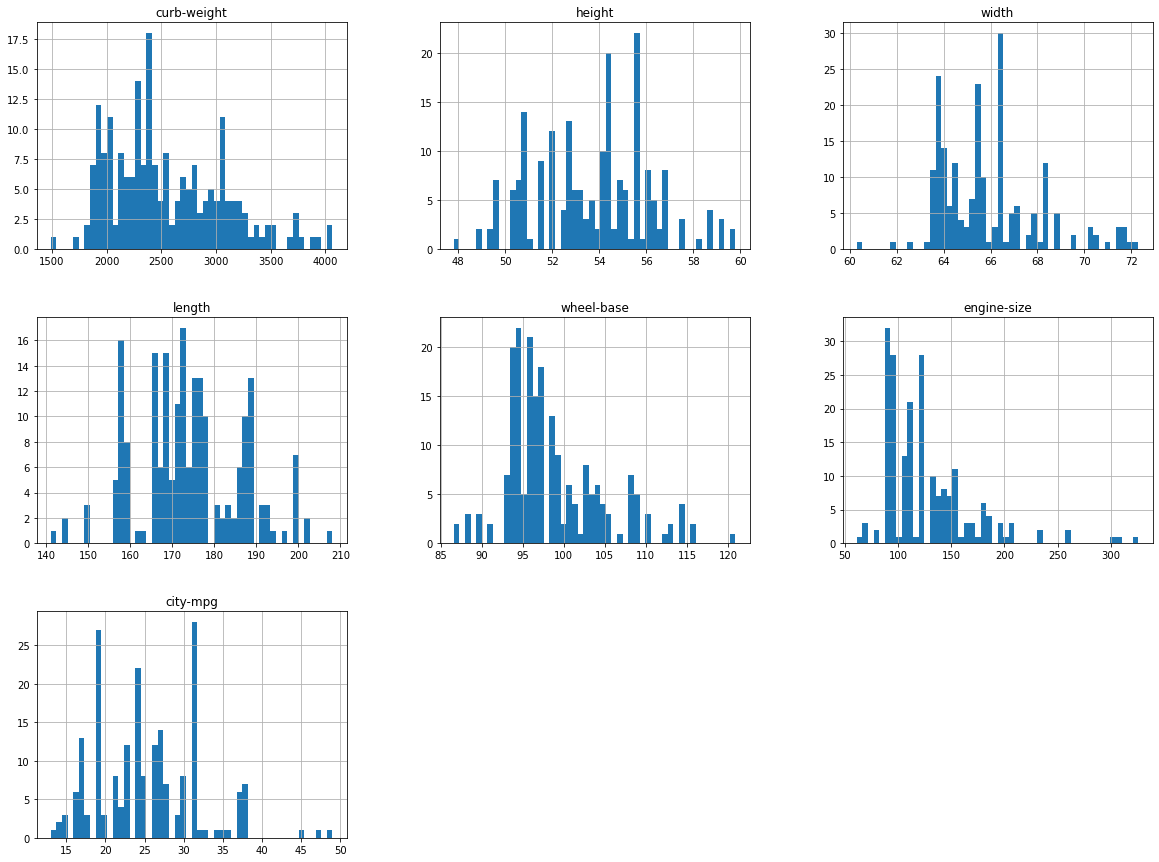

In [12]:
# Using histogram to show continuous data
%matplotlib inline

car_df[numeric_cols].hist(bins=50, figsize=(20,15))
plt.show()

The above histogram and descriptive statistics show as following:

The engine-size is skewed right with a median of 120, a min of 61, a max of 326, and a standard deviation of 41.64. It has outliers since 3 standard deviations above the mean(126) would be 250.92, but the max is 326.

The city-mpg is skewed right with a median of 24, a min of 13, a max of 49, and a standard deviation of 6.54. It has outliers since 3 standard deviations above the mean(25.21) would be 44.83, but the max is 49.

Other variables have no obvious outliers.

Next, I will use boxplots to show the engine size and city-mpg.

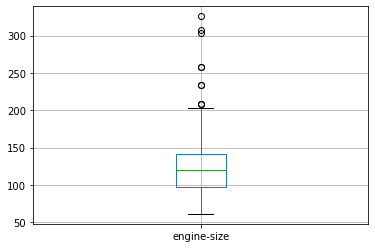

In [13]:
car_df.boxplot(column=['engine-size'])
plt.show()

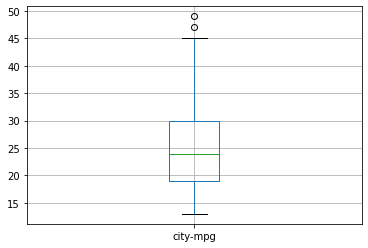

In [14]:
car_df.boxplot(column=['city-mpg'])
plt.show()

I will drop outliers in the Clean data because outliers can affect the accuracy of linear models.

Based on checking these attributes, two attributes are category data. We can do categorical data analysis.

Then to draw bar charts to illustrate each category column.

In [15]:
car_df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
62      6
114     6
160     6
101     6
88      6
102     5
82      5
84      5
76      5
145     5
97      5
86      4
111     4
92      4
123     4
152     3
90      3
207     3
85      3
73      3
182     3
121     3
184     2
176     2
161     2
?       2
112     2
94      2
100     2
155     2
156     2
56      2
162     2
52      2
288     1
142     1
140     1
262     1
200     1
135     1
115     1
134     1
154     1
58      1
120     1
106     1
48      1
175     1
143     1
60      1
78      1
64      1
72      1
55      1
Name: horsepower, dtype: int64

In [16]:
car_df['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
4500     7
5250     7
5800     7
4150     5
4200     5
4350     4
4750     4
4250     3
4400     3
5900     3
5100     3
6600     2
?        2
5600     1
5750     1
4650     1
5300     1
4900     1
Name: peak-rpm, dtype: int64

In [17]:
def groupby_column_size(g_series, ax, title):
    bar_names = g_series.index
    bar_values = g_series.values
    X = np.arange(len(bar_values))
    width=0.1

    # to draw a bar chart
    ax.bar(X, bar_values, alpha=0.9, width = width, color='blue')
    
    # to set x and y axis label
    ax.set_xlabel(title)
    ax.set_ylabel('count')
    
    # the ticks of x axis
    ax.set_xticks(X)

    # the label of each group
    ax.set_xticklabels(bar_names)
    
def car_column_groupby_bar(car_df, cols):
    """
    To draw bar charts for all columns.

    Input parameters:
      none.

    Returns:
      null.

    Raises:
      none
    """
    
    # Create 24 subplots and unpack the output array immediately
    fig, axsubs = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

    # To draw bar chart and best fit line
    groupby_column_size(car_df.groupby(cols[0], sort=True).size(), axsubs[0], cols[0])
    groupby_column_size(car_df.groupby(cols[1], sort=True).size(), axsubs[1], cols[1])
    

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

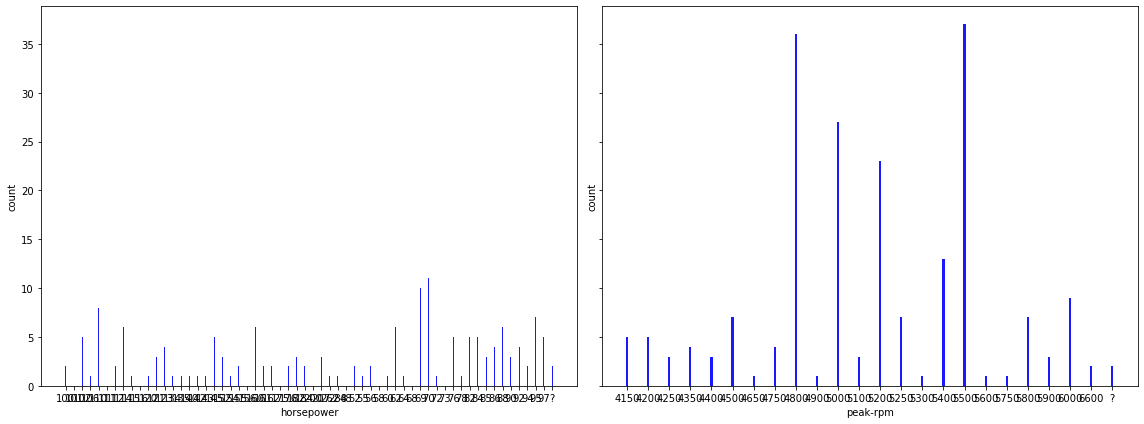

In [18]:
# To call mat_school_gender_hist to show picture
car_column_groupby_bar(car_df, [necessary_attrs[6], necessary_attrs[7]])

In [19]:
car_df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [20]:
car_df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

1) The above bar charts show that the horsepower and the peak-rpm have '?' values. The '?' values need to drop in the Data Preparation step.

2) The horsepower and peak-rpm have many values. It is difficult to be an effective categorical variable. I will convert them in the select and create features.

Next, to see the correlation.

In [21]:
corr_matrix = car_df.corr()
corr_matrix['curb-weight'].sort_values(ascending = False)

curb-weight    1.000000
length         0.877728
width          0.867032
engine-size    0.850594
wheel-base     0.776386
height         0.295572
city-mpg      -0.757414
Name: curb-weight, dtype: float64

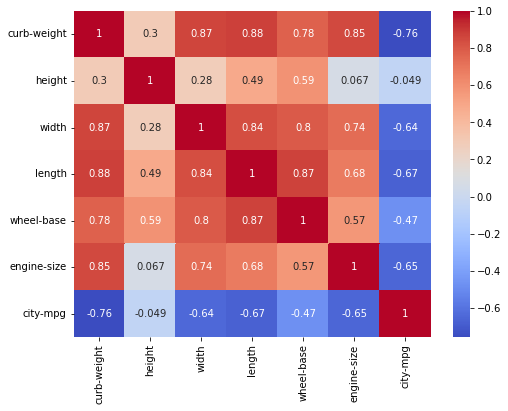

In [22]:
# correlation heatmap 
plt.figure(figsize=(8,6))
ax = sns.heatmap(car_df.corr(), cmap='coolwarm', annot=True)
plt.show()

The above heatmap and correlation table show as following:

The curb-weight and the length have the highest correlation value with 0.877.

But, the curb-weight and the city-mpg have the lowest correlation value with -0.757.

Next, to use a scatter chart to illustrate relations.

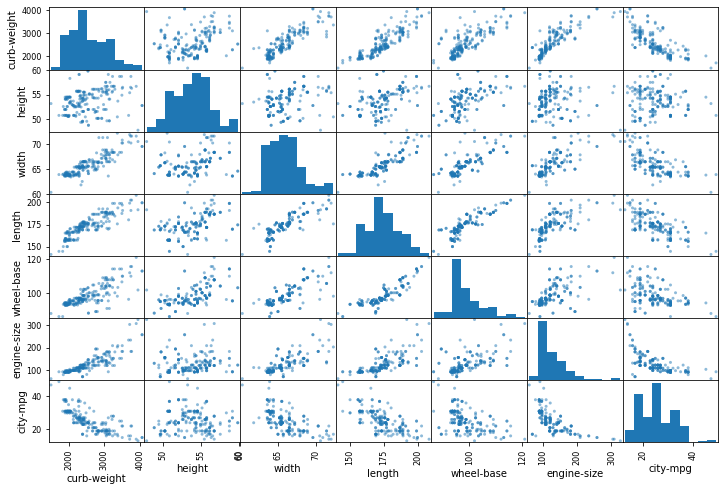

In [23]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

scatter_matrix(car_df[numeric_cols], figsize=(12, 8))
plt.show()

The above scatter chart and descriptive statistics show as following:

The curb-weight and the height show a slight upward trend.

(curb-weight, width), (curb-weight, length), (curb-weight, wheel-base), and (curb-weight, engine-size) show a clear upward line.

But, curb-weight and the city-mpg show a downward trend.

## Summary of EDA
- The engine-size and the city-mpg have obvious outliers. I will drop these outliers.
- The horsepower and the peak-rpm have '?' values. I will drop these '?' rows.
- The horsepower and peak-rpm have many categories. I will convert them to 4 levels.
- The curb-weight and the length have the highest correlation value. But the curb-weight and the city-mpg have a negative correlation value. When I select features, I would prefer variables with high correlation values.
- The width, length, wheel-base, and engine-size are preferred features. I will select them to train models.

# 3. Data Preparation (Clean Data)
- Drop outliers from engine-size and city-mpg
- Drop NaN and null values
- Drop ? from horsepower and peak-rpm

### To drop outliers from engine-size and city-mpg

- Drop data from engine-size that large than (mean + 3 * standard deviation)
- Drop data from city-mpg that large than (mean + 3 * standard deviation)

In [24]:
engine_size_mean_3std = car_df['engine-size'].mean() + 3 * car_df['engine-size'].std()
print('The value of (mean + 3 * standard deviation) in engine-size is %.4f' %engine_size_mean_3std)

The value of (mean + 3 * standard deviation) in engine-size is 251.8354


In [25]:
city_mpg_mean_3std = car_df['city-mpg'].mean() + 3 * car_df['city-mpg'].std()
print('The value of (mean + 3 * standard deviation) in city-mpg is %.4f' %city_mpg_mean_3std)

The value of (mean + 3 * standard deviation) in city-mpg is 44.8459


In [26]:
# To drop all outliers with conditions
car_df.drop(car_df[(car_df['engine-size'] > engine_size_mean_3std) | (car_df['city-mpg'] > city_mpg_mean_3std)].index, inplace = True)
car_df.shape

(197, 9)

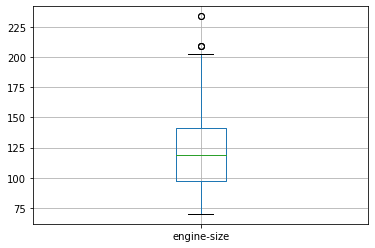

In [27]:
car_df.boxplot(column=['engine-size'])
plt.show()

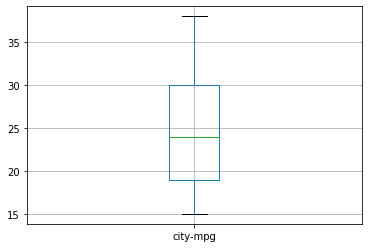

In [28]:
car_df.boxplot(column=['city-mpg'])
plt.show()

The engine-size and the city-mpg do not have outliers now.

### To drop NaN and null values

In [29]:
# To check NaN
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curb-weight  197 non-null    int64  
 1   height       197 non-null    float64
 2   width        197 non-null    float64
 3   length       197 non-null    float64
 4   wheel-base   197 non-null    float64
 5   engine-size  197 non-null    int64  
 6   horsepower   197 non-null    object 
 7   peak-rpm     197 non-null    object 
 8   city-mpg     197 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 15.4+ KB


There are not Nan or Null values.

### To drop ? in horsepower and peak-rpm

In [30]:
# car_df.loc[:, ('horsepower')] = car_df.drop(car_df[car_df['horsepower'] == '?'].index)
# car_df.loc[:, ('peak-rpm')] = car_df.drop(car_df[car_df['peak-rpm'] == '?'].index)
car_df.drop(car_df[car_df['horsepower'] == '?'].index, inplace = True)
car_df.drop(car_df[car_df['peak-rpm'] == '?'].index, inplace = True)

In [31]:
car_df.shape

(195, 9)

After drop ? from horsepower and peak-rpm, the step of Clean Data has finished..

# 4. Select and Create Features
- To process horsepower and peak-rpm
    - The categorical variables horsepower and peak-rpm have many values. It is difficult to be an effective categorical variable. I will convert them.

### To process  horsepower and peak-rpm

I want to split horsepower and peak-rpm into 4 levels.
- level 1: value < 25% (quantile 1)
- level 2: value >= 25% (quantile 1) and value < 50% (quantile 2)
- level 3: value >= 50% (quantile 2) and value < 75% (quantile 3)
- level 4: value >= 75% (quantile 4)

In [32]:
# copy a data set
lg_car_df = car_df.copy()

In [33]:
categorical_cols = ['horsepower', 'peak-rpm']

In [34]:
def get_4qs(df, col):
    result = {}
    result['q1'] = df[col].quantile(.25)
    result['q2'] = df[col].quantile(.50)
    result['q3'] = df[col].quantile(.75)
    return result

def get_level(q4_dict, a):
    level = 'q1'
    if a <= q4_dict.get('q1'):
        level = 'q1'
    elif a > q4_dict.get('q1') and a <= q4_dict.get('q2'):
        level = 'q2'
    elif a > q4_dict.get('q2') and a <= q4_dict.get('q3'):
        level = 'q3'
    else:
        level = 'q4'
        
    return level

def split_by_q1_to_q4(df, cols):
    
    for col in cols:
        q4_dict = get_4qs(df, col)
        
        df.loc[:, (col)] = df.apply(lambda row: get_level(q4_dict, row[col]), axis=1)

In [35]:
lg_car_df.loc[:, ('horsepower', 'peak-rpm')] = lg_car_df[categorical_cols].astype(float)

In [36]:
split_by_q1_to_q4(lg_car_df, ['horsepower', 'peak-rpm'])

In [37]:
lg_car_df.head()

,curb-weight,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
0,2548,48.8,64.1,168.8,88.6,130,q3,q2,21
1,2548,48.8,64.1,168.8,88.6,130,q3,q2,21
2,2823,52.4,65.5,171.2,94.5,152,q4,q2,19
3,2337,54.3,66.2,176.6,99.8,109,q3,q3,24
4,2824,54.3,66.4,176.6,99.4,136,q3,q3,18


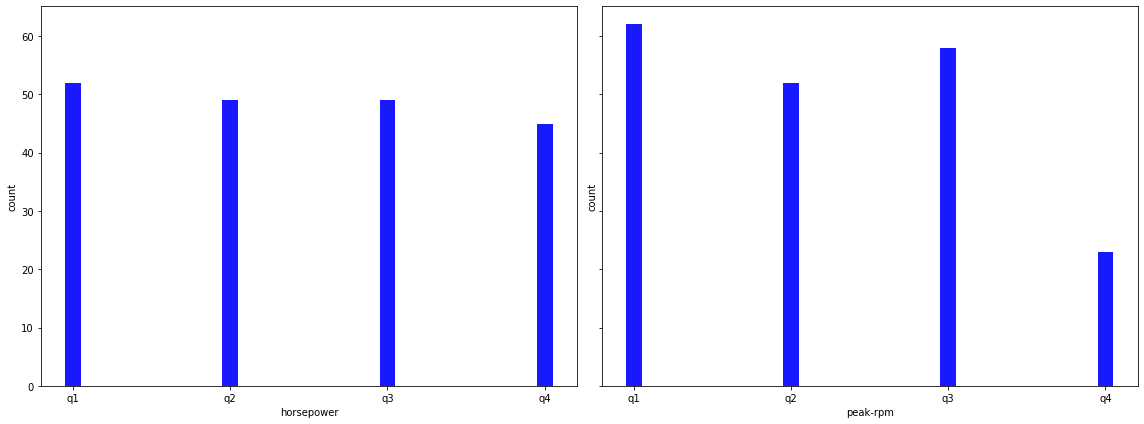

In [38]:
car_column_groupby_bar(lg_car_df, ['horsepower', 'peak-rpm'])

# 5. Standardize and Dummy Variables


- Standardize Explanatory variables
  - The reasons why Explanatory variables should standardize.
    - If two Explanatory variables have different scales, they might affect the accuracy of models. For example, the mean engine-size is 126.9 but the mean of the city-mpg is 25.2.

- Create dummy value for categorical variables

### Standardize Explanatory variables
- Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1

In [39]:
norm_lg_car_df = lg_car_df.copy()

In [40]:
norm_lg_car_df['height'] = preprocessing.scale(norm_lg_car_df['height'])
norm_lg_car_df['width'] = preprocessing.scale(norm_lg_car_df['width'])
norm_lg_car_df['length'] = preprocessing.scale(norm_lg_car_df['length'])
norm_lg_car_df['wheel-base'] = preprocessing.scale(norm_lg_car_df['wheel-base'])
norm_lg_car_df['engine-size'] = preprocessing.scale(norm_lg_car_df['engine-size'])
norm_lg_car_df['city-mpg'] = preprocessing.scale(norm_lg_car_df['city-mpg'])

In [41]:
norm_lg_car_df.head()

,curb-weight,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
0,2548,-2.046351,-0.865850,-0.428769,-1.795350,0.205945,q3,q2,-0.715842
1,2548,-2.046351,-0.865850,-0.428769,-1.795350,0.205945,q3,q2,-0.715842
2,2823,-0.562170,-0.164434,-0.219001,-0.733643,0.881408,q4,q2,-1.057554
3,2337,0.221147,0.186273,0.252977,0.220093,-0.438815,q3,q3,-0.203275
4,2824,0.221147,0.286476,0.252977,0.148113,0.390162,q3,q3,-1.228409


In [42]:
print("%.1f, %.1f" %(norm_lg_car_df['height'].std(), norm_lg_car_df['height'].mean()))

1.0, -0.0


### Create dummy value for categorical variables

I will copy two data sets because I will train two linear regression models

- model_df_1: length, width, engine-size, horsepower

    - length         0.877728
    - width          0.867032
    - engine-size    0.850594

- model_df_2: peak-rpm, width, engine-size, horsepower
    

In [43]:
model_df_1_cols = ['curb-weight', 'length', 'width', 'engine-size', 'horsepower']
model_df_2_cols = ['curb-weight', 'peak-rpm', 'width', 'engine-size', 'horsepower']

In [44]:
model_df_1 = norm_lg_car_df[model_df_1_cols]
model_df_1 = pd.get_dummies(model_df_1)
model_df_1.head(3)

,curb-weight,length,width,engine-size,horsepower_q1,horsepower_q2,horsepower_q3,horsepower_q4
0,2548,-0.428769,-0.865850,0.205945,0,0,1,0
1,2548,-0.428769,-0.865850,0.205945,0,0,1,0
2,2823,-0.219001,-0.164434,0.881408,0,0,0,1


In [45]:
model_df_2 = norm_lg_car_df[model_df_2_cols]
model_df_2 = pd.get_dummies(model_df_2)
model_df_2.head(3)

,curb-weight,width,engine-size,peak-rpm_q1,peak-rpm_q2,peak-rpm_q3,peak-rpm_q4,horsepower_q1,horsepower_q2,horsepower_q3,horsepower_q4
0,2548,-0.865850,0.205945,0,1,0,0,0,0,1,0
1,2548,-0.865850,0.205945,0,1,0,0,0,0,1,0
2,2823,-0.164434,0.881408,0,1,0,0,0,0,0,1


# 6. Split Data

- To split data set to train set and test set

In [46]:
def split_df(model_df, response_name):
    # move the response variable (in this case "curb-weight") to a separate variable
    y = model_df[response_name]
    
    # If you want to preserve the original dataframe in its entirety, make a copy of the original dataframe 
    # so that the original is preserved
    X = model_df.copy()
    
    # now drop the ArrDelay column from 'X' so that the response variable is removed from the explanatory variables
    X.drop(response_name, axis=1, inplace=True)
    
    # Now split the data into training and testing subsets. 
    # We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
    # if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
    
    # Let's check the results
    # print(len(X_train), len(X_test))
    
    return X_train, X_test, y_train, y_test

In [47]:
# Test split function
X_train, X_test, y_train, y_test = split_df(model_df_1, 'curb-weight')

In [48]:
# Check
X_train.head(3)

,length,width,engine-size,horsepower_q1,horsepower_q2,horsepower_q3,horsepower_q4
41,0.148093,-0.314738,-0.408112,0,0,1,0
44,-1.556272,-1.116356,-1.022169,1,0,0,0
128,-0.420029,-0.414940,2.170928,0,0,0,1


# 7. Select Models using K-fold cross validation
- Model 1 LinearRegression
  - Explanatory variables: length, width, engine-size, horsepower
- Model 2 LinearRegression
  - Explanatory variables: peak-rpm, width, engine-size, horsepower


## Model  1 LinearRegression

- Response: curb-weight
- Explanatory variables: length, width, engine-size, horsepower
  - length, width, engine-size are three variables that have the highest correlation values in all variables.
  - When I add the horsepower that is a categorical variable, the R^2 increased. 

In [49]:
# Model 1
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# Using model_df_1 to create training and test set
X_train, X_test, y_train, y_test = split_df(model_df_1, 'curb-weight')

# create a new dataframe containing only the DepDelay and TaxiOut variables (our explanatory variables for the linear
# regression model)
newX_train = X_train.copy()

# sanity check
newX_train.head()

,length,width,engine-size,horsepower_q1,horsepower_q2,horsepower_q3,horsepower_q4
41,0.148093,-0.314738,-0.408112,0,0,1,0
44,-1.556272,-1.116356,-1.022169,1,0,0,0
128,-0.420029,-0.414940,2.170928,0,0,0,1
17,2.036004,2.541026,2.631470,0,0,0,1
16,1.756314,1.037992,2.631470,0,0,0,1


In [50]:
# Assing the model function you want to use to a variable
model = LinearRegression()

# fit the model using 10-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores1 = cross_val_score(model, newX_train, y_train, cv=10)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores1)

# calculate the average R^2 across all 10 folds
print('The average R^2 of Model 1 is %.4f' %np.mean(scores1))

[0.94162665 0.87419575 0.90271797 0.92544303 0.56477522 0.92821322
 0.89793141 0.91690358 0.84980268 0.787361  ]
The average R^2 of Model 1 is 0.8589


## Model 2 LinearRegression
- Response: curb-weight
- Explanatory variables: peak-rpm, width, engine-size, horsepower
  - peak-rpm has the lowest correlation values in all variables. I want to see whether peak-rpm can affect R^2 of a model.
  - length, width, are two variables that have the highest correlation values in all variables.
  - When I add the horsepower that is a categorical variable, the R^2 increased. 

In [51]:
# Model 2

# Using model_df_1 to create training and test set
X_train, X_test, y_train, y_test = split_df(model_df_2, 'curb-weight')

# create a new dataframe containing only the DepDelay and TaxiOut variables (our explanatory variables for the linear
# regression model)
newX_train = X_train.copy()

# sanity check
newX_train.head()

,width,engine-size,peak-rpm_q1,peak-rpm_q2,peak-rpm_q3,peak-rpm_q4,horsepower_q1,horsepower_q2,horsepower_q3,horsepower_q4
41,-0.314738,-0.408112,0,0,0,1,0,0,1,0
44,-1.116356,-1.022169,0,0,1,0,1,0,0,0
128,-0.414940,2.170928,0,0,0,1,0,0,0,1
17,2.541026,2.631470,0,0,1,0,0,0,0,1
16,1.037992,2.631470,0,0,1,0,0,0,0,1


In [52]:
# Assing the model function you want to use to a variable
model = LinearRegression()

# fit the model using 10-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores2 = cross_val_score(model, newX_train, y_train, cv=10)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores2)

# calculate the average R^2 across all 10 folds
print('The average R^2 of Model 2 is %.4f' %np.mean(scores2))

[0.91567046 0.88247585 0.86688141 0.82870342 0.49900453 0.80273378
 0.84111026 0.93105591 0.82931512 0.88270851]
The average R^2 of Model 2 is 0.8280


In [53]:
print('The average R^2 of Model 1 is %.4f and the figure for Model 2 is %.4f' %(np.mean(scores1), np.mean(scores2)))

The average R^2 of Model 1 is 0.8589 and the figure for Model 2 is 0.8280


# 8. Conclusion
- The Model 1 LinearRegression has higher R^2 than the model 2.
  - The correlation of length is 0.877728. But The correlation of city-mpg is -0.757414. Two models have the same explanatory variables except for the length and city-mpg. Variables with higher correlation can be used as the preferred variables for linear regression models.
  
- Clear data step is very important and useful. The outliers can affect the accuracy of linear models. I got a higher R^2 after I dropped the outliers from horsepower and peak-rpm.

- The solution that split horsepower and peak-rpm into 4 levels is not the best option.

- Setting "K"-fold = 10 can guarantee a model is low bias. During the cross validation, I found that there is a gourp data have a obvious low R^2.

### The part can be promoted.
- How to use a categorical variable that has many categories?
- How to select a group of feature to train a model?
- How to find out the data set of k-fold having the lowest R^2? If the data set can find out, we can analyze these data to improve the accuracy of models.

# 9. References
- scikit-learn.org. The User Guide. [online] Available at https://scikit-learn.org/stable/user_guide.html [Accessed 3 September 2021].

- archive.ics.uci.edu. The Automobile data set. [online] Available at https://archive.ics.uci.edu/ml/datasets/Automobile [Accessed 3 September 2021].

- Machine Learning Pocket Reference. The code samples. [online] Available at https://github.com/mattharrison/ml_pocket_reference [Accessed 3 September 2021].

- Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow. The code samples. [online] Available at https://github.com/ageron/handson-ml2 [Accessed 3 September 2021].

- DAV-6150-100. Lecture Notes [online] Available at https://yu.instructure.com/courses/50398/assignments/191940?module_item_id=704923 [Accessed 3 September 2021].